# MNIST Test

이번 실습에서는 MNIST data로 MLP model을 학습한 뒤, 직접 손으로 쓴 글씨를 입력하여 제대로 분류가 되는지를 확인해보겠습니다.

In [1]:
## Google Colab에서 TensorFlow 2.x 버전을 사용하기 위해서는 아래 magic command를 수행하면 간편하게 할 수 있습니다

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

TensorFlow 2.x selected.


In [2]:
## 필요한 Library들을 import 합니다
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

## TensorFlow, Keras version 확인
print(tf.__version__)
print(keras.__version__)

2.1.0
2.2.4-tf


In [0]:
np.random.seed(777)
tf.random.set_seed(777)

## Coding Tips

#### 1. Hyper Paramter 정하기
#### 2. Data 준비(불러오기 or download 등)
#### 3. Dataset 구성 (tf.data.Dataset 이용)
#### 4. Modlel 만들기 (Neural Network model)
#### 5. Loss function 정의, Optimizer 선택
#### 6. Training (Train, Test function 만들기 포함)
#### 7. Validation(or Test) 결과 확인

In [0]:
## Hyper-parameters
learning_rate = 0.001
N_EPOCHS = 30
N_BATCH = 100
N_CLASS = 10

In [0]:
## MNIST Dataset #########################################################
mnist = keras.datasets.mnist
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
##########################################################################

## Fashion MNIST Dataset #################################################
#mnist = keras.datasets.fashion_mnist
#class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
##########################################################################

In [6]:
## MNIST dataset load
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() 

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
N_TRAIN = train_images.shape[0]
N_TEST = test_images.shape[0]

In [0]:
## image를 0~1사이 값으로 만들기 위하여 255로 나누어줌
train_images = train_images.astype(np.float32) / 255.
test_images = test_images.astype(np.float32) / 255.

## one-hot encoding
train_labels = keras.utils.to_categorical(train_labels, N_CLASS)
test_labels = keras.utils.to_categorical(test_labels, N_CLASS)

In [0]:
## dataset 구성    
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(
                buffer_size=100000).batch(N_BATCH).repeat()
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(N_BATCH)

In [0]:
def create_model():
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28)))
    model.add(keras.layers.Dense(256))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.ReLU())
    model.add(keras.layers.Dense(256))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.ReLU())
    model.add(keras.layers.Dense(128))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.ReLU())
    model.add(keras.layers.Dense(128))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.ReLU())
    model.add(keras.layers.Dense(10))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Softmax())
    return model

In [0]:
model = create_model()

In [13]:
## Parameters for training
steps_per_epoch = N_TRAIN//N_BATCH
validation_steps = N_TEST//N_BATCH
print(steps_per_epoch, validation_steps)

600 100


In [0]:
## Learning rate decay
lr_schedule = keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=learning_rate,
                                                          decay_steps=steps_per_epoch*10,
                                                          decay_rate=0.3,
                                                          staircase=True)

In [15]:
## Create model, compile & summary
model.compile(optimizer=tf.keras.optimizers.Adam(lr_schedule),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
batch_normalization (BatchNo (None, 256)               1024      
_________________________________________________________________
re_lu (ReLU)                 (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 256)               0

In [16]:
## Training
history = model.fit(train_dataset, epochs=N_EPOCHS, steps_per_epoch=steps_per_epoch, 
                    validation_data=test_dataset, validation_steps=validation_steps)

Train for 600 steps, validate for 100 steps
Epoch 1/30
600/600 [==============================] - 7s 12ms/step - loss: 0.3844 - accuracy: 0.9370 - val_loss: 0.1795 - val_accuracy: 0.9722
Epoch 2/30
600/600 [==============================] - 4s 7ms/step - loss: 0.1616 - accuracy: 0.9725 - val_loss: 0.1162 - val_accuracy: 0.9777
Epoch 3/30
600/600 [==============================] - 4s 7ms/step - loss: 0.1032 - accuracy: 0.9797 - val_loss: 0.1035 - val_accuracy: 0.9751
Epoch 4/30
600/600 [==============================] - 4s 7ms/step - loss: 0.0757 - accuracy: 0.9840 - val_loss: 0.0767 - val_accuracy: 0.9790
Epoch 5/30
600/600 [==============================] - 4s 7ms/step - loss: 0.0598 - accuracy: 0.9862 - val_loss: 0.0801 - val_accuracy: 0.9786
Epoch 6/30
600/600 [==============================] - 4s 7ms/step - loss: 0.0449 - accuracy: 0.9895 - val_loss: 0.0722 - val_accuracy: 0.9796
Epoch 7/30
600/600 [==============================] - 4s 7ms/step - loss: 0.0382 - accuracy: 0.9907 - v

In [0]:
## 추가 library import
import os
from PIL import Image

In [29]:
## 그림판을 이용하여 손으로 숫자를 쓴 다음 파일로 저장하고 아래를 실행하여 upload 합니다
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving image.png to image.png
User uploaded file "image.png" with length 33872 bytes


(28, 28, 3)
(28, 28)


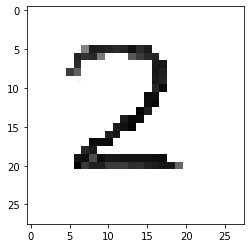

In [30]:
## image file의 경로 설정
cur_dir = os.getcwd()
img_path = os.path.join(cur_dir, 'image.png')
## image file 읽기
cur_img = Image.open(img_path)
## 28x28로 resize
cur_img = cur_img.resize((28, 28))
image = np.asarray(cur_img)
## image shape 확인
print(image.shape)
## color image일 경우 RGB 평균값으로 gray scale로 변경
try:
  image = np.mean(image, axis=2)
except:
  pass
## 다시 image shape 확인
print(image.shape)
## 화면에 출력
plt.imshow(image, cmap='gray')
plt.show()

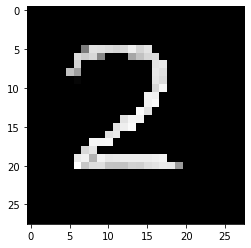

In [31]:
## upload한 image는 흰 배경에 검은 글씨로 되어 있으므로, MNIST data와 같이 검은 배경에 흰 글씨로 변경
image = np.abs(255-image)
## MNIST와 동일하게 data preprocessing(255로 나눠줌)
image = image.astype(np.float32)/255.
## 화면에 출력하여 확인
plt.imshow(image, cmap='gray')
plt.show()

In [32]:
## shape을 변경하여 학습된 model에 넣고 결과 확인
image = np.reshape(image, (1, 28, 28))
print("Model이 예측한 값은 {} 입니다.".format(np.argmax(model.predict(image), -1)))

Model이 예측한 값은 [2] 입니다.
